# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models. 

3. Why is the Gini a good loss function for categorical target variables? 

4. Why do trees tend to overfit, and how can this tendency be constrained? 

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1. Trees split the dataset at decision nodes using a recursive and greedy strategy. This minimizes differences in outcomes within groups, forming a structure of decision nodes.

2. This will happen naturally through recursive partitioning, as the tree assumes no linear relationship.

3. Because it measures impurity, in that it is low when a node contains mainly one class, creating purer splits in classification.

4. By making too many fine splits, capturing noise. This can be constrained with pruning, depth limits, or minimum node size.

5. False, trees can handle both categorical and numerical variables by selecting good split points.

6. They simplify optimization and interpretation, and they recursively handle complex splits over multiple levels.

7. Too deep or too many leaves = overfitting. Too shallow or high training error = underfitting.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load data
df = pd.read_csv("./data/cars_hw.csv")
print(f"observations: {df.shape[0]}")
print("features: {df.shape[1]}")
print("variables:", df.columns.tolist())
df.head()

observations: 976
features: {df.shape[1]}
variables: ['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price']


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [17]:
# Feature preparing
categorical = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
numerical = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
target = 'Price'

dummies = pd.get_dummies(df[categorical], drop_first=True)
X = pd.concat([df[numerical], dummies], axis=1)
y = df[target]

In [21]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Tune min samples
r2 = {}
for i in range(1, 26):
    tree = DecisionTreeRegressor(min_samples_leaf=i, random_state=42)
    tree.fit(X_train, y_train)
    r2_score = tree.score(X_test, y_test)
    r2[i] = r2_score

r2

{1: 0.8182867955766739,
 2: 0.7791006594900161,
 3: 0.8019082918926088,
 4: 0.813787467085308,
 5: 0.8253410511223336,
 6: 0.8035337682329031,
 7: 0.8016519504527037,
 8: 0.8040692309574341,
 9: 0.7970596759785047,
 10: 0.7940871433957849,
 11: 0.7970094628850196,
 12: 0.7822561983677742,
 13: 0.7830934804803342,
 14: 0.7770575742281992,
 15: 0.7806307526177868,
 16: 0.7709886341099872,
 17: 0.772462470976059,
 18: 0.7706093685726004,
 19: 0.7498528142434848,
 20: 0.7495510835456863,
 21: 0.7505023025109951,
 22: 0.7502189629127393,
 23: 0.7333981211603038,
 24: 0.7327985839401091,
 25: 0.726866463039452}

In [ ]:
# The highest R^2 score is gotten when min_samples_leaf=5

In [41]:
# Tree model
best_tree = DecisionTreeRegressor(min_samples_leaf=5, random_state=42)
best_tree.fit(X_train, y_train)
pred_tree = best_tree.predict(X_test)

In [42]:
r2_tree = r2_score(y_test, pred_tree)
rmse = np.sqrt(mean_squared_error(y_test, pred_tree))
print(f"R^2: {r2_tree}")
print(f"RMSE: {rmse}")

R^2: 0.8253410511223336
RMSE: 141536.54096868183


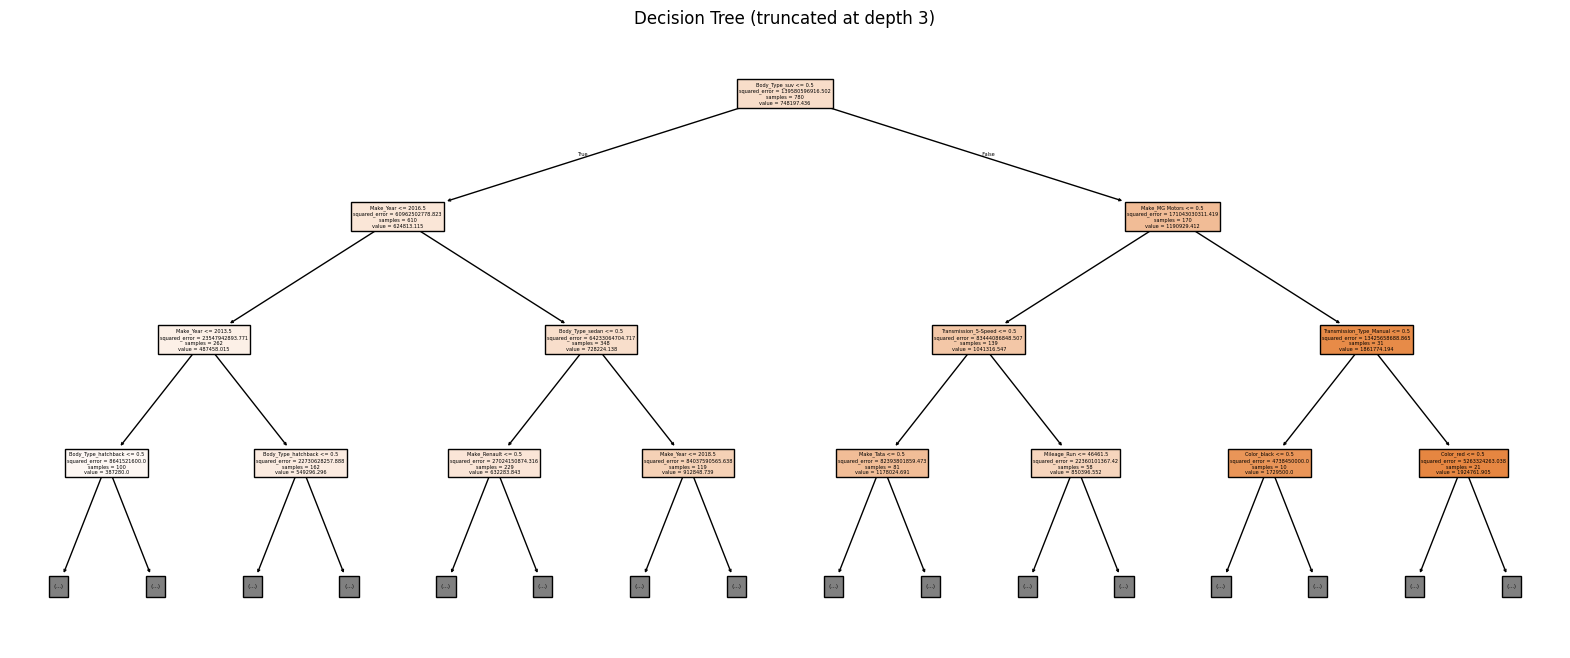

In [43]:
# Plot dendrogram
plt.figure(figsize=(20, 8))
plot_tree(best_tree, feature_names=X.columns, filled=True, max_depth=3)
plt.title("Decision Tree (truncated at depth 3)")
plt.show()

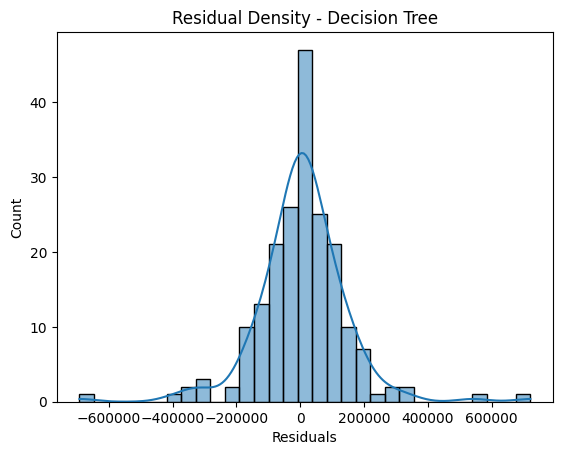

In [45]:
# Plot residuals
residuals = y_test - pred_tree
sns.histplot(residuals, kde=True)
plt.title("Residual Density - Decision Tree")
plt.xlabel("Residuals")
plt.show()

In [ ]:
# The distribution of the residuals are very symmetric and centered around 0.

In [46]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

In [47]:
r2_lr = r2_score(y_test, pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, pred_lr))
print(f"R^2: {r2_lr}")
print(f"RMSE: {rmse}")

R^2: 0.8202733305970829
RMSE: 143575.19660662432


In [ ]:
# The decision tree regressor performs slightly better than the linear regressor, likely because it is capturing some non-linear relationships that impact the price that the linear regressor is not.

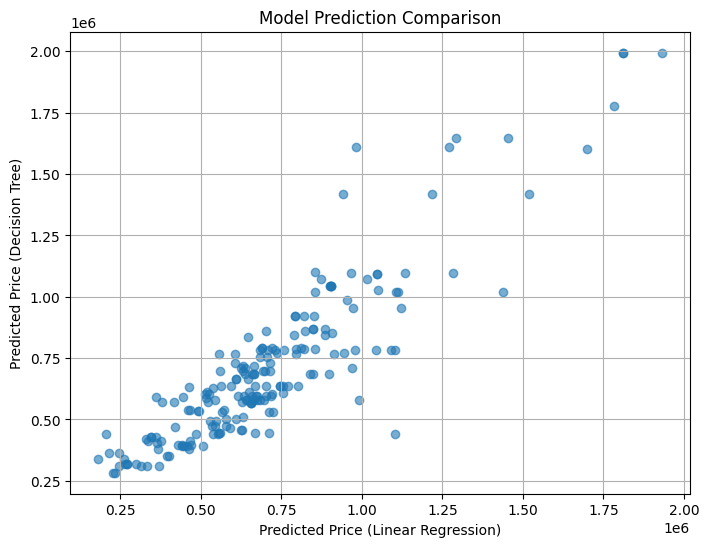

In [48]:
# Scatter plot comparison
plt.figure(figsize=(8,6))
plt.scatter(pred_lr, pred_tree, alpha=0.6)
plt.xlabel("Predicted Price (Linear Regression)")
plt.ylabel("Predicted Price (Decision Tree)")
plt.title("Model Prediction Comparison")
plt.grid(True)
plt.show()

In [49]:
# The scatterplot shows that the two models predict similar values on the lower prices, but greatly differ when the price is higher. This is likely because there are some non-linear relationships that make some cars more expensive than others, causing the two models to disagree.

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [52]:
# Load the dataset
df = pd.read_csv("./data/corporate_ratings.csv")
print(f"observations: {df.shape[0]}")
print(f"variables: {df.shape[1]}")
df.head()

observations: 2029
variables: 31


,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


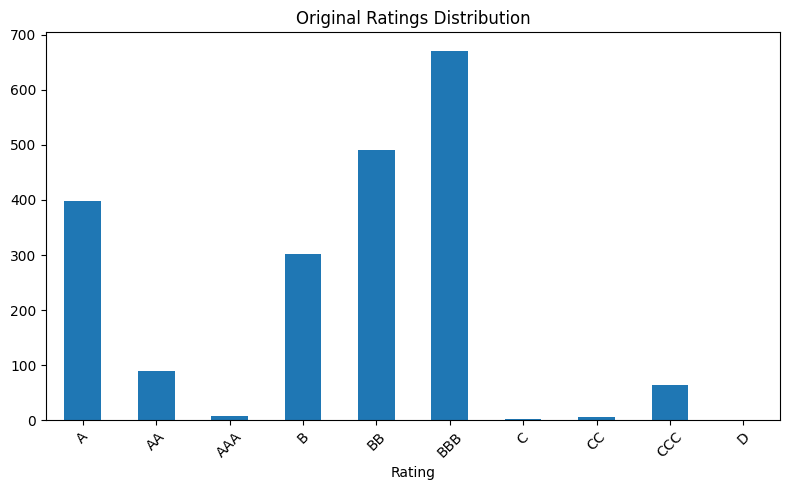

In [53]:
# Histogram of ratings variable
plt.figure(figsize=(8,5))
df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title("Original Ratings Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
# Function to simplify ratings into A, B, and C for use in apply function
def collapse_ratings(r):
    if r.startswith('AAA') or r.startswith('AA') or r.startswith('A'):
        return 'A'
    elif r.startswith('BBB') or r.startswith('BB') or r.startswith('B'):
        return 'B'
    elif r.startswith('CCC') or r.startswith('CC') or r.startswith('C') or r == 'D':
        return 'C'
    else:
        return 'Other'
# Apply function
df['Rating_Collapsed'] = df['Rating'].apply(collapse_ratings)
print(df['Rating_Collapsed'].value_counts())

Rating_Collapsed
B    1463
A     494
C      72
Name: count, dtype: int64


In [ ]:
# Prepare features
cols_to_drop = ['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name']
categorical = ['Sector']
df_model = df.drop(columns=cols_to_drop)
# Drop rows with "Other" collapsed ratings or missing values
df_model = df_model[df['Rating_Collapsed'] != 'Other'].dropna()
# One-hot encode sector
dummies = pd.get_dummies(df_model[categorical], drop_first=True)
X = pd.concat([df_model.drop(columns=categorical + ['Rating_Collapsed']), dummies], axis=1)
y = df_model['Rating_Collapsed']

In [67]:
# Train/test split and fit tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
tree_clf.fit(X_train, y_train)
pred = tree_clf.predict(X_test)

acc = accuracy_score(y_test, pred)
print(f"Accuracy: {acc}")

Accuracy: 0.6822660098522167


In [71]:
# Confusion Matrix
cm = pd.crosstab(y_test, pred)
cm

col_0,A,B,C
Rating_Collapsed,,,
A,47,49,0
B,59,227,8
C,2,11,3


In [72]:
# Add Rating Agency as predictor
X_with_agency = pd.concat([X, pd.get_dummies(df.loc[df_model.index, 'Rating Agency Name'], drop_first=True)], axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_with_agency, y, test_size=0.2, random_state=42)

tree_clf2 = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
tree_clf2.fit(X_train2, y_train2)
pred2 = tree_clf2.predict(X_test2)

# Evaluation with rating agency
acc2 = accuracy_score(y_test2, pred2)
print(f"Accuracy with Rating Agency: {acc2}")

Accuracy with Rating Agency: 0.7561576354679803


In [73]:
# Confusion Matrix
cm = pd.crosstab(y_test, pred2)
cm

col_0,A,B,C
Rating_Collapsed,,,
A,54,42,0
B,34,253,7
C,0,16,0


In [ ]:
# Adding the rating agency does improve the accuracy quite a bit. This is probably due to an agency having systematic differences in how they rate bonds, being stricter or more lenient.